In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Functions for Linear Regression

In [51]:
# Create summary function to quickly show statsmodel summary output.

def linreg_summary(X_train, y_train):
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

In [74]:
def fit_linear_reg(X_train, y_train, X_test, y_test):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    print('R2 Score:',metrics.r2_score(y_train, y_hat_train))
    print('RMSE Train:',np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))
    print('RMSE Test:',np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))
    X_int = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_int).fit()
    return model.summary()

# Regression on Airbnb Price

In [2]:
# airbnb_data = pd.read_csv("large_clean_data/airbnb_model_data_clean.csv", index_col=0)

In [44]:
airbnb_data = pd.read_csv('cleaned_data/current_listing_availability.csv', index_col=0)

In [45]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6144 entries, 0 to 6143
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   last_scraped                      6144 non-null   object 
 1   id                                6144 non-null   int64  
 2   host_id                           6144 non-null   int64  
 3   host_is_superhost                 6144 non-null   int64  
 4   zipcode                           6144 non-null   float64
 5   latitude                          6144 non-null   float64
 6   longitude                         6144 non-null   float64
 7   accommodates                      6144 non-null   int64  
 8   bathrooms                         6144 non-null   float64
 9   beds                              6144 non-null   float64
 10  price                             6144 non-null   float64
 11  minimum_nights                    6144 non-null   float64
 12  maximu

## Prepare Data for Modeling

In [46]:
# need to drop columns that are highly correlated

airbnb_data.drop(columns=['zipcode','latitude','longitude','availability_30','availability_60',
                          'availability_90','number_of_reviews','review_scores_accuracy',
                          'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                          'review_scores_location','review_scores_value',
                          'calculated_host_listings_count','occ_rate','monthly_income'],inplace=True)

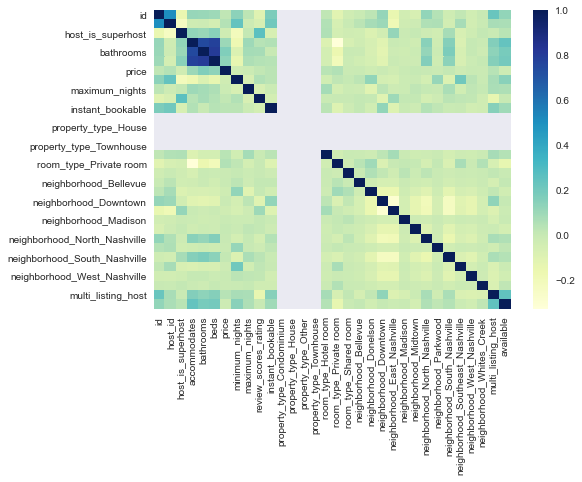

In [47]:
heatmap = sns.heatmap(airbnb_data.corr(), cmap='YlGnBu', annot=False)

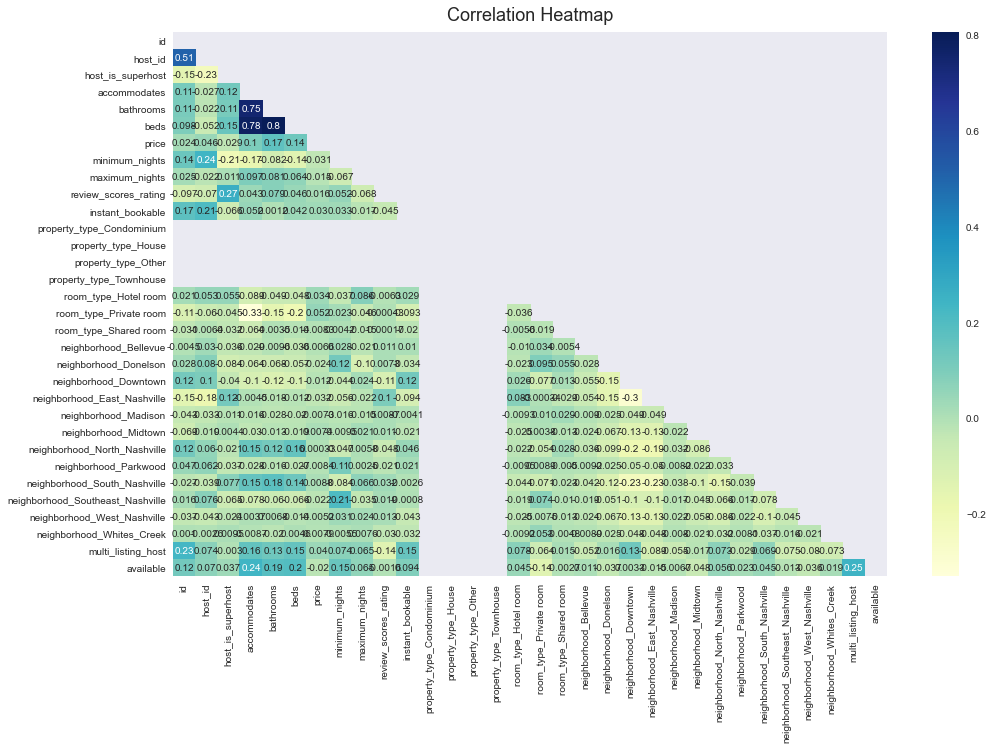

In [48]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(airbnb_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(airbnb_data.corr(), mask=mask, cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [49]:
airbnb_data.drop(columns=['property_type_Condominium','property_type_Townhouse',
                          'property_type_Other','property_type_Townhouse'],inplace=True)

In [50]:
airbnb_data

last_scraped        id    host_id  host_is_superhost  accommodates  \
0      2021-02-20      6422      12172                  1             2   
1      2021-02-20     25613      95811                  1             2   
2      2021-02-20    136015     666322                  0             2   
3      2021-02-20    258817      22296                  1             2   
4      2021-02-20    289242      22296                  1             1   
...           ...       ...        ...                ...           ...   
6139   2021-02-20  48207668  368944610                  0             5   
6140   2021-02-21  48208643  359230893                  0             5   
6141   2021-02-20  48211893  153902467                  0             2   
6142   2021-02-20  48224293  368944610                  0             3   
6143   2021-02-20  48226977   60934272                  0             8   

      bathrooms  beds  price  minimum_nights  maximum_nights  ...  \
0           1.0   3.0   40.0            30.0           365.0  ...   
1           1.0   1.0   75.0             2.0            30.0  ...   
2           1.0   1.0  103.0            30.0          1125.0  ...   
3           1.0   2.0   27.0            30.0           365.0  ...   
4           1.0   3.0   24.0            30.0           365.0  ...   
...         ...   ...    ...             ...             ...  ...   
6139        1.0   2.0  148.0            90.0           365.0  ...   
6140        2.0   2.0  139.0            30.0           365.0  ...   
6141        2.0   2.0   48.0            30.0            90.0  ...   
6142        1.0   1.0  121.0            90.0           365.0  ...   
6143        2.0   3.0  151.0             1.0            29.0  ...   

      neighborhood_Madison  neighborhood_Midtown  \
0                        0                     0   
1                        0                     0   
2                        0                     0   
3                        0                     0   
4                        0                     0   
...                    ...                   ...   
6139                     0                     0   
6140                     0                     0   
6141                     0                     0   
6142                     0                     0   
6143                     0                     0   

      neighborhood_North_Nashville  neighborhood_Parkwood  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
6139                             0                      0   
6140                             1                      0   
6141                             0                      0   
6142                             0                      0   
6143                             0                      0   

      neighborhood_South_Nashville  neighborhood_Southeast_Nashville  \
0                                0                                 0   
1                                0                                 0   
2                                0                                 0   
3                                0                                 0   
4                                0                                 0   
...                            ...                               ...   
6139                             0                                 0   
6140                             0                                 0   
6141                             0                                 0   
6142                             0                                 0   
6143                             0                                 0   

      neighborhood_West_Nashville  neighborhood_Whit

In [75]:
# set up variables and drop non numerical columns
y = airbnb_data['price']
X = airbnb_data.drop(['last_scraped', 'id','host_id','price'], axis=1)

In [76]:
# perform train-test split using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Run Baseline Model

In [77]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 0.07146771518816963
RMSE Train: 809.5672688018683
RMSE Test: 1066.857186995266


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     15.05
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           9.33e-62
Time:                        17:58:01   Log-Likelihood:                -39887.
No. Observations:                4915   AIC:                         7.983e+04
Df Residuals:                    4889   BIC:                         8.000e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              646.5375    204.106      3.168      0.002     246.398    1046.677
host_is_superhost                  -69.3238     25.525     -2.716      0.007    -119.364     -19.284
accommodates                        -1.7549      5.809     -0.302      0.763     -13.143       9.634
bathrooms                          101.5155     14.857      6.833      0.000      72.388     130.643
beds                                10.7235      6.131      1.749      0.080      -1.297      22.744
minimum_nights                      -0.7593      0.666     -1.140      0.254      -2.065       0.547
maximum_nights                      -0.0474      0.024     -1.995      0.046      -0.094      -0.001
review_scores_rating                 2.2732      1.989      1.143      0.253      -1.626       6.172
instant_bookable                    51.0918     24.184      2.113      0.035       3.680      98.504
property_type_House               2.034e-14   7.06e-14      0.288      0.773   -1.18e-13    1.59e-13
room_type_Hotel room               152.7502    124.648      1.225      0.220     -91.617     397.117
room_type_Private room             143.8271     41.412      3.473      0.001      62.641     225.013
room_type_Shared room              -47.0836    205.561     -0.229      0.819    -450.075     355.908
neighborhood_Bellevue             -832.9987    136.367     -6.108      0.000   -1100.340    -565.658
neighborhood_Donelson             -869.9161     82.475    -10.548      0.000   -1031.605    -708.227
neighborhood_Downtown             -796.5158     75.085    -10.608      0.000    -943.716    -649.316
neighborhood_East_Nashville       -835.7224     74.577    -11.206      0.000    -981.927    -689.518
neighborhood_Madison              -811.0492    147.805     -5.487      0.000   -1100.813    -521.286
neighborhood_Midtown              -757.3696     85.862     -8.821      0.000    -925.697    -589.042
neighborhood_North_Nashville      -858.0527     79.049    -10.855      0.000   -1013.024    -703.081
neighborhood_Parkwood             -826.7986    144.295     -5.730      0.000   -1109.682    -543.915
neighborhood_South_Nashville      -831.8085     77.209    -10.773      0.000    -983.172    -680.445
neighborhood_Southeast_Nashville  -852.7575     95.775     -8.904      0.000   -1040.519    -664.996
neighborhood_West_Nashville       -796.2266     85.816     -9.278      0.000    -964.465    -627.988
neighborhood_Whites_Creek         -815.0329    147.634     -5.521      0.000   -1104.461    -525.605
multi_listing_host                  70.5204     26.436      2.668      0.008      18.694     122.347
available                           -0.4433      0.112     -3.944      0.000      -0.664      -0.223
=====================================================

## Run Model Using Only most Correlated Features

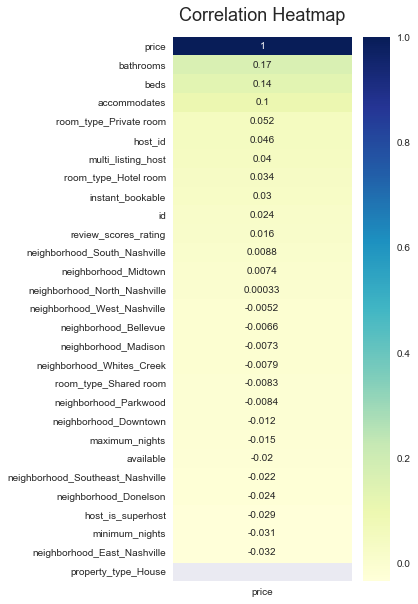

In [78]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(airbnb_data.corr()[['price']].sort_values(by='price', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [79]:
X_train = X_train[['bathrooms','beds','accommodates']]
X_test = X_test[['bathrooms','beds','accommodates']]

In [80]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 0.03254278204697891
RMSE Train: 826.3619681920934
RMSE Test: 1094.970493490336


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     55.06
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           5.31e-35
Time:                        17:58:43   Log-Likelihood:                -39988.
No. Observations:                4915   AIC:                         7.998e+04
Df Residuals:                    4911   BIC:                         8.001e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           61.8230     24.802      2.493      0.013      13.201     110.445
bathrooms      107.8702     14.766      7.305      0.000      78.922     136.818
beds            10.0873      6.166      1.636      0.102      -2.001      22.176
accommodates   -12.8188      5.434     -2.359      0.018     -23.473      -2.165
==============================================================================
Omnibus:                    12434.531   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        142600233.307
Skew:                          28.065   Prob(JB):                         0.00
Kurtosis:                     835.567   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Choose Model Features Using Stepwise Selection

In [81]:
y = airbnb_data['price']
X = airbnb_data.drop(['last_scraped', 'id','host_id','price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [84]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(new_x_cols)

<ipython-input-82-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathrooms                      with p-value 6.48863e-36
Add  room_type_Private room         with p-value 4.61016e-08
Add  available                      with p-value 0.00058518
Add  instant_bookable               with p-value 0.00470209
Add  host_is_superhost              with p-value 0.00990207
resulting features:
['bathrooms', 'room_type_Private room', 'available', 'instant_bookable', 'host_is_superhost']


In [86]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [87]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 0.04241068830313066
RMSE Train: 822.13678770971
RMSE Test: 1088.8306001500237


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     43.48
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           5.17e-44
Time:                        18:00:00   Log-Likelihood:                -39963.
No. Observations:                4915   AIC:                         7.994e+04
Df Residuals:                    4909   BIC:                         7.998e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     42.7936     32.188      1.329      0.184     -20.309     105.897
bathrooms                118.5466      8.470     13.997      0.000     101.943     135.151
room_type_Private room   203.3863     38.727      5.252      0.000     127.464     279.308
available                 -0.3887      0.108     -3.609      0.000      -0.600      -0.178
instant_bookable          63.3362     24.002      2.639      0.008      16.281     110.392
host_is_superhost        -61.7859     23.946     -2.580      0.010    -108.730     -14.841
==============================================================================
Omnibus:                    12348.516   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        136005989.966
Skew:                          27.582   Prob(JB):                         0.00
Kurtosis:                     816.066   Cond. No.                         748.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression on Average Home Value

In [132]:
regression_df = pd.read_csv("cleaned_data/model_data_clean.csv", index_col=0)

In [133]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2015-06-01 to 2021-02-01
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39 non-null     float64
 1   host_id                           39 non-null     float64
 2   zipcode                           39 non-null     float64
 3   latitude                          39 non-null     float64
 4   longitude                         39 non-null     float64
 5   accommodates                      39 non-null     float64
 6   bathrooms                         39 non-null     float64
 7   beds                              39 non-null     float64
 8   price                             39 non-null     float64
 9   minimum_nights                    39 non-null     float64
 10  maximum_nights                    39 non-null     float64
 11  availability_30                   39 non-null     float64
 12

In [134]:
regression_df.head()

id       host_id       zipcode   latitude  longitude  \
2015-06-01  4.911123e+06  1.847859e+07  37202.099174  36.161913 -86.768430   
2015-07-01  4.585624e+06  1.588542e+07  37202.203096  36.157222 -86.767316   
2015-08-01           NaN           NaN           NaN        NaN        NaN   
2015-09-01           NaN           NaN           NaN        NaN        NaN   
2015-10-01  5.435875e+06  1.857827e+07  37201.418483  36.156564 -86.767390   

            accommodates  bathrooms      beds       price  minimum_nights  \
2015-06-01      4.223140   1.450413  2.033058  163.115702        1.545455   
2015-07-01      4.607430   1.507740  2.308978  202.349226        1.698452   
2015-08-01           NaN        NaN       NaN         NaN             NaN   
2015-09-01           NaN        NaN       NaN         NaN             NaN   
2015-10-01      4.795735   1.534597  2.406161  200.524171        1.747867   

            ...  neighborhood_Whites_Creek  property_type_Condominium  \
2015-06-01  ...                        3.0                        1.0   
2015-07-01  ...                        9.0                       33.0   
2015-08-01  ...                        0.0                        0.0   
2015-09-01  ...                        0.0                        0.0   
2015-10-01  ...                       23.0                       54.0   

            property_type_House  property_type_Other  property_type_Townhouse  \
2015-06-01                 78.0                 11.0                      1.0   
2015-07-01               1048.0                100.0                     18.0   
2015-08-01                  0.0                  0.0                      0.0   
2015-09-01                  0.0                  0.0                      0.0   
2015-10-01               1360.0                130.0                     51.0   

            room_type_Hotel room  room_type_Private room  \
2015-06-01                   0.0                    39.0   
2015-07-01                   0.0                   451.0   
2015-08-01                   0.0                     0.0   
2015-09-01                   0.0                     0.0   
2015-10-01                   0.0                   566.0   

            room_type_Shared room  inventory  avg_home_value  
2015-06-01                    3.0        121        198388.0  
2015-07-01                   18.0       1615        199865.0  
2015-08-01                    0.0          0        201227.0  
2015-09-01                    0.0          0        202952.0  
2015-10-01                   30.0       2110        204617.0  

[5 rows x 49 columns]

In [135]:
regression_df.tail()

id       host_id       zipcode   latitude  longitude  \
2020-10-01  2.947930e+07  1.089430e+08  37202.054170  36.161081 -86.769555   
2020-11-01  2.973666e+07  1.117253e+08  37202.339950  36.160847 -86.770116   
2020-12-01  3.052512e+07  1.180080e+08  37202.158459  36.160308 -86.769276   
2021-01-01  3.076685e+07  1.191460e+08  37201.979548  36.160198 -86.769105   
2021-02-01  3.122308e+07  1.220661e+08  37202.113444  36.160366 -86.768799   

            accommodates  bathrooms      beds       price  minimum_nights  \
2020-10-01      6.279273   1.918002  3.715442  212.609249        5.343848   
2020-11-01      6.231287   1.910765  3.692683  211.482086        5.445080   
2020-12-01      6.198440   1.911263  3.645701  212.335529        7.772144   
2021-01-01      6.201080   1.912140  3.649215  225.319863        7.497546   
2021-02-01      6.230794   1.925212  3.665365  233.017741        7.776042   

            ...  neighborhood_Whites_Creek  property_type_Condominium  \
2020-10-01  ...                       49.0                        0.0   
2020-11-01  ...                       49.0                        0.0   
2020-12-01  ...                       47.0                        0.0   
2021-01-01  ...                       47.0                        0.0   
2021-02-01  ...                       48.0                        0.0   

            property_type_House  property_type_Other  property_type_Townhouse  \
2020-10-01                  0.0               6055.0                      0.0   
2020-11-01                  0.0               5945.0                      0.0   
2020-12-01                  0.0               6153.0                      0.0   
2021-01-01                  0.0               6112.0                      0.0   
2021-02-01                  0.0               6144.0                      0.0   

            room_type_Hotel room  room_type_Private room  \
2020-10-01                  73.0                   681.0   
2020-11-01                  74.0                   652.0   
2020-12-01                  73.0                   650.0   
2021-01-01                  76.0                   647.0   
2021-02-01                  66.0                   659.0   

            room_type_Shared room  inventory  avg_home_value  
2020-10-01                   16.0       6055        298809.0  
2020-11-01                   18.0       5945        301461.0  
2020-12-01                   16.0       6153        304539.0  
2021-01-01                   17.0       6112        307585.0  
2021-02-01                   18.0       6144        310812.0  

[5 rows x 49 columns]

## Prepare Data for Modeling

In [136]:
regression_df.dropna(inplace=True)

In [137]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 2015-06-01 to 2021-02-01
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39 non-null     float64
 1   host_id                           39 non-null     float64
 2   zipcode                           39 non-null     float64
 3   latitude                          39 non-null     float64
 4   longitude                         39 non-null     float64
 5   accommodates                      39 non-null     float64
 6   bathrooms                         39 non-null     float64
 7   beds                              39 non-null     float64
 8   price                             39 non-null     float64
 9   minimum_nights                    39 non-null     float64
 10  maximum_nights                    39 non-null     float64
 11  availability_30                   39 non-null     float64
 12

In [138]:
regression_df.drop(columns=['zipcode','latitude','longitude','availability_30','availability_60',
                          'availability_90','review_scores_accuracy',
                          'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                          'review_scores_location','review_scores_value','calculated_host_listings_count',
                            'occ_rate','monthly_income'],inplace=True)

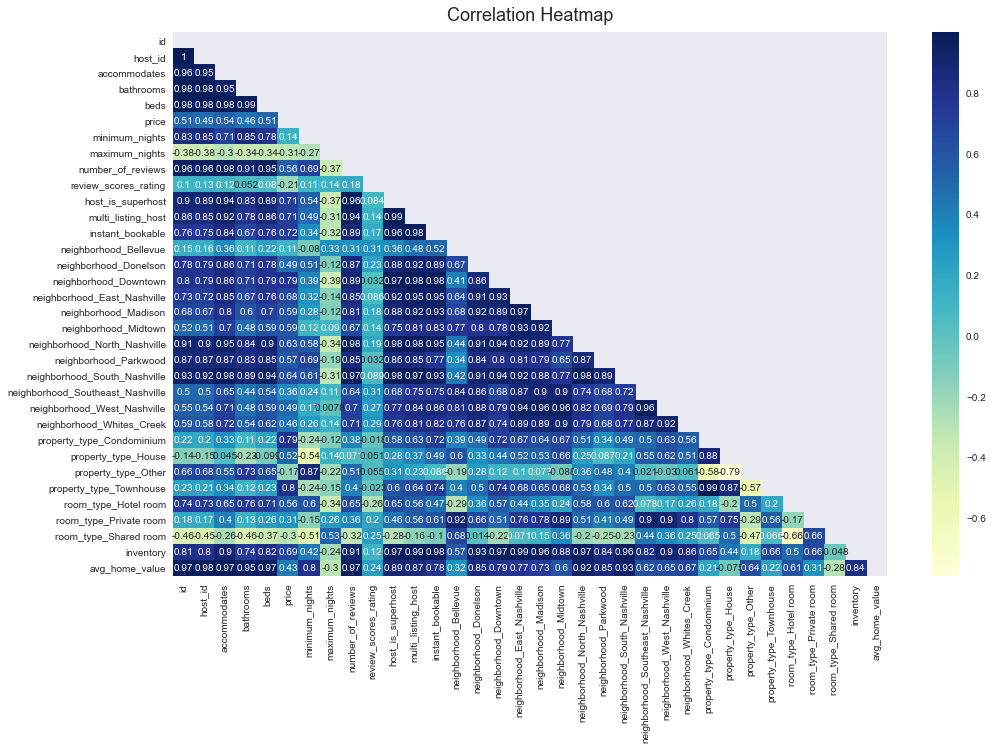

In [139]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr(), mask=mask, cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

There are clearly many features correlated with each other in the data.

## Run Baseline Model

In [140]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)

In [141]:
# y = regression_df['total_average']
# X = regression_df['inventory']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [143]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 1.0
RMSE Train: 6.26982242668472e-07
RMSE Test: 6119.972313657032


C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\saman\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 03 Apr 2021   Prob (F-statistic):                nan
Time:                        18:21:47   Log-Likelihood:                 282.63
No. Observations:                  31   AIC:                            -503.3
Df Residuals:                       0   BIC:                            -458.8
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             9.769e+04        inf          0        nan         nan         nan
accommodates                      1.922e+05        inf          0        nan         nan         nan
bathrooms                         3.253e+05        inf          0        nan         nan         nan
beds                             -2.802e+05        inf         -0        nan         nan         nan
price                              350.4988        inf          0        nan         nan         nan
minimum_nights                    1.057e+04        inf          0        nan         nan         nan
maximum_nights                      -0.0323        inf         -0        nan         nan         nan
number_of_reviews                 5054.0983        inf          0        nan         nan         nan
review_scores_rating             -7928.6468        inf         -0        nan         nan         nan
host_is_superhost                   22.9830        inf          0        nan         nan         nan
multi_listing_host                 -30.3761        inf         -0        nan         nan         nan
instant_bookable                    93.5419        inf          0        nan         nan         nan
neighborhood_Bellevue             1178.1268        inf          0        nan         nan         nan
neighborhood_Donelson             -651.2948        inf         -0        nan         nan         nan
neighborhood_Downtown             -536.7062        inf         -0        nan         nan         nan
neighborhood_East_Nashville       -608.2369        inf         -0        nan         nan         nan
neighborhood_Madison              -656.8326        inf         -0        nan         nan         nan
neighborhood_Midtown              -574.4407        inf         -0        nan         nan         nan
neighborhood_North_Nashville      -912.4779        inf         -0        nan         nan         nan
neighborhood_Parkwood             -727.1663        inf         -0        nan         nan         nan
neighborhood_South_Nashville      -539.7391        inf         -0        nan         nan         nan
neighborhood_Southeast_Nashville  -517.4752        inf         -0        nan         nan         nan
neighborhood_West_Nashville       -817.1497        inf         -0        nan         nan         nan
neighborhood_Whites_Creek         -900.7088        inf         -0        nan         nan         nan
property_type_Condominium          167.0309        inf          0        nan         nan         nan
property_type_House                170.4118        inf          0        nan         nan         nan
property_type_Other                 81.8901        inf          0        nan         nan         nan
property_type_Townhouse           -248.2318        in

Our model is extremely overfit to the training data.

Using this many features has severely overfit our data. We have more variables than datapoints.

## Run Model Using Only Most Correlated Features

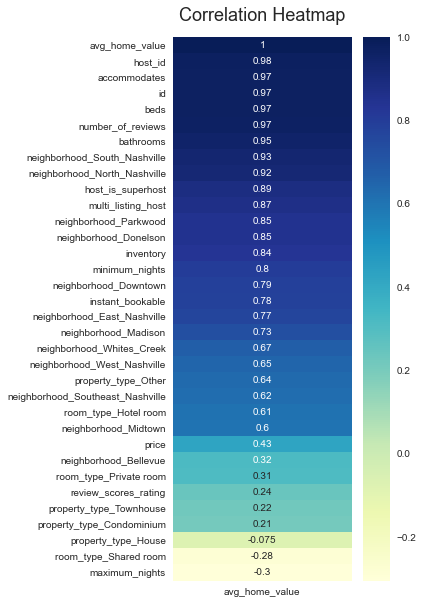

In [144]:
plt.figure(figsize=(4, 10))
#mask = np.triu(np.ones_like(regression_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(regression_df.corr()[['avg_home_value']].sort_values(by='avg_home_value', ascending=False),
                       cmap='YlGnBu', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [145]:
X_train = X_train[['bathrooms','accommodates','beds','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','multi_listing_host']]
X_test = X_test[['bathrooms','accommodates','beds','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','multi_listing_host']]

In [146]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 0.98833854197633
RMSE Train: 3057.205198435325
RMSE Test: 3673.553997997927


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     233.1
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.91e-19
Time:                        18:21:55   Log-Likelihood:                -292.77
No. Observations:                  31   AIC:                             603.5
Df Residuals:                      22   BIC:                             616.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          5.94e+04   1.07e+05      0.557      0.583   -1.62e+05    2.81e+05
bathrooms                     5.898e+04   6.55e+04      0.900      0.378   -7.69e+04    1.95e+05
accommodates                 -4686.6902   2.45e+04     -0.191      0.850   -5.55e+04    4.61e+04
beds                           1.94e+04   3.69e+04      0.526      0.604   -5.72e+04    9.59e+04
number_of_reviews             1836.3304    557.604      3.293      0.003     679.931    2992.730
host_is_superhost              -27.8380      6.240     -4.461      0.000     -40.779     -14.897
neighborhood_North_Nashville    69.3611     33.043      2.099      0.048       0.834     137.888
neighborhood_South_Nashville     6.6818     39.532      0.169      0.867     -75.302      88.665
multi_listing_host               8.8148      5.682      1.551      0.135      -2.969      20.599
==============================================================================
Omnibus:                        1.705   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.485
Skew:                          -0.509   Prob(JB):                        0.476
Kurtosis:                       2.661   Cond. No.                     9.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our RMSE Test and Train scores have moved much closer together, and our R2 is still extremely high.

There are some features in this model with p-values above 0.05. Let's try using stepwise selection to select our features based on p-values instead.

## Choose Model Features Using Stepwise Selection

In [147]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [148]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(new_x_cols)

<ipython-input-82-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  beds                           with p-value 1.51358e-20
Add  review_scores_rating           with p-value 3.53552e-06
Add  neighborhood_Donelson          with p-value 0.00069435
Add  minimum_nights                 with p-value 1.11414e-06
Add  bathrooms                      with p-value 0.00522634
resulting features:
['beds', 'review_scores_rating', 'neighborhood_Donelson', 'minimum_nights', 'bathrooms']


In [149]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [150]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 0.9958224997920294
RMSE Train: 1829.8117110136745
RMSE Test: 4344.305518231691


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1192.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           6.96e-29
Time:                        18:22:11   Log-Likelihood:                -276.86
No. Observations:                  31   AIC:                             565.7
Df Residuals:                      25   BIC:                             574.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.142e+06   2.57e+05     -8.348      0.000   -2.67e+06   -1.61e+06
beds                   7.691e+04   1.09e+04      7.048      0.000    5.44e+04    9.94e+04
review_scores_rating   2.425e+04   2576.274      9.412      0.000    1.89e+04    2.96e+04
neighborhood_Donelson    42.6437      8.425      5.062      0.000      25.293      59.995
minimum_nights         4372.1727    652.488      6.701      0.000    3028.348    5715.998
bathrooms             -1.177e+05   3.85e+04     -3.060      0.005   -1.97e+05   -3.85e+04
==============================================================================
Omnibus:                        1.780   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.179
Skew:                          -0.181   Prob(JB):                        0.555
Kurtosis:                       2.115   Cond. No.                     2.61e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Run Simple Regression Model Using Number of Reviews

In [151]:
y = regression_df['avg_home_value']
X = regression_df[['number_of_reviews']]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [153]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 0.9417914636870158
RMSE Train: 6830.327097887484
RMSE Test: 6880.600518116493


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     469.2
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           1.87e-19
Time:                        18:22:57   Log-Likelihood:                -317.69
No. Observations:                  31   AIC:                             639.4
Df Residuals:                      29   BIC:                             642.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.622e+05   5169.891     31.367      0.000    1.52e+05    1.73e+05
number_of_reviews  2427.3013    112.057     21.661      0.000    2198.118    2656.484
==============================================================================
Omnibus:                        2.797   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.147
Skew:                           0.644   Prob(JB):                        0.342
Kurtosis:                       2.926   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

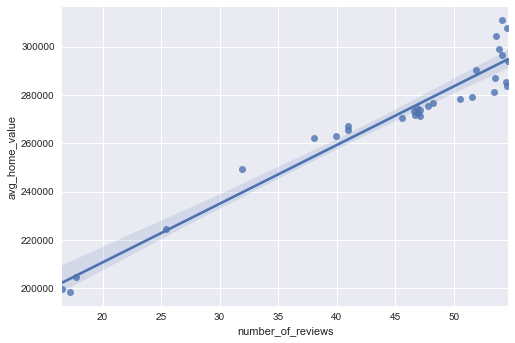

In [154]:
sns.regplot(X_train,y_train)

Using only the number of reviews, we were able to predict the average home value with 94% accuracy within $6800. Our test RMSE is also very close to our train RMSE, meaning our model is not overfit.

However, the first model we ran with the top correlated features performed strongest. We will remove the features with p-values above 0.05 and check our results.

## Run Model with Significant features from Model 2

In [160]:
y = regression_df['avg_home_value']
X = regression_df.drop(['host_id','id','avg_home_value'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [161]:
X_train = X_train[['bathrooms','accommodates','beds','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','multi_listing_host']]
X_test = X_test[['bathrooms','accommodates','beds','number_of_reviews',
                   'host_is_superhost','neighborhood_North_Nashville',
                   'neighborhood_South_Nashville','multi_listing_host']]

In [162]:
new_x_cols = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(new_x_cols)

<ipython-input-82-3a06d07146b7>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  beds                           with p-value 1.51358e-20
Add  number_of_reviews              with p-value 0.00136496
Add  host_is_superhost              with p-value 0.000679446
Add  neighborhood_North_Nashville   with p-value 0.000469527
resulting features:
['beds', 'number_of_reviews', 'host_is_superhost', 'neighborhood_North_Nashville']


In [163]:
X_train = X_train[new_x_cols]
X_test = X_test[new_x_cols]

In [164]:
fit_linear_reg(X_train, y_train, X_test, y_test)

R2 Score: 0.9864830531029989
RMSE Train: 3291.451548768552
RMSE Test: 4065.4099318504977


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         avg_home_value   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     474.4
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           6.95e-24
Time:                        18:29:58   Log-Likelihood:                -295.06
No. Observations:                  31   AIC:                             600.1
Df Residuals:                      26   BIC:                             607.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9.476e+04   9437.335     10.041      0.000    7.54e+04    1.14e+05
beds                          3.547e+04   5948.395      5.964      0.000    2.32e+04    4.77e+04
number_of_reviews             1664.9565    412.135      4.040      0.000     817.801    2512.112
host_is_superhost              -21.3465      3.459     -6.171      0.000     -28.457     -14.236
neighborhood_North_Nashville    92.1727     23.053      3.998      0.000      44.787     139.558
==============================================================================
Omnibus:                        1.137   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.928
Skew:                          -0.152   Prob(JB):                        0.629
Kurtosis:                       2.209   Cond. No.                     5.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We are able to obtain our best RMSE scores from running the model with these features.

In [165]:
feature_cols = list(X_train.columns)

In [166]:
y = regression_df['avg_home_value']
X = regression_df[feature_cols]
final_reg_features_df = pd.concat([y,X], axis=1)

In [167]:
final_reg_features_df

avg_home_value      beds  number_of_reviews  host_is_superhost  \
2015-06-01        198388.0  2.033058          17.206612                 23   
2015-07-01        199865.0  2.308978          16.536223                286   
2015-10-01        204617.0  2.406161          17.715640                434   
2016-09-01        224658.0  2.602991          25.443699                974   
2017-09-01        249172.0  2.836834          31.943173               1961   
2018-04-01        262160.0  3.054797          38.099596               2376   
2018-05-01        263200.0  3.071048          39.961143               2380   
2018-07-01        265646.0  3.114947          40.941241               2666   
2018-08-01        267141.0  3.102364          40.988182               2738   
2018-09-01        268481.0  3.098633          42.363731               2718   
2018-10-01        269740.0  3.000171          43.922526               2839   
2018-11-01        270601.0  3.066374          45.616281               2932   
2018-12-01        271199.0  3.082217          47.102390               2944   
2019-01-01        271835.0  3.127876          46.678560               3161   
2019-02-01        272519.0  3.147395          46.975848               3180   
2019-03-01        273319.0  3.203883          46.617638               3225   
2019-04-01        273929.0  3.224996          47.079982               3450   
2019-05-01        274656.0  3.203968          46.818792               3532   
2019-06-01        275588.0  3.269071          47.761241               3572   
2019-07-01        276659.0  3.249826          48.191830               3874   
2019-08-01        277592.0  3.265536          49.482692               3831   
2019-09-01        278427.0  3.323033          50.498421               3952   
2019-10-01        279309.0  3.336951          51.544493               4240   
2019-11-01        280372.0  3.358999          53.331394               4284   
2019-12-01        281289.0  3.398932          53.452870               4302   
2020-01-01        282420.0  3.407407          54.235678               4235   
2020-02-01        283604.0  3.493658          54.547437               4357   
2020-03-01        285216.0  3.552430          54.464739               4331   
2020-04-01        286807.0  3.528644          53.517751               4306   
2020-05-01        288677.0  3.589985          52.307336               4170   
2020-06-01        290436.0  3.615508          51.865362               3977   
2020-07-01        292234.0  3.602994          51.398054               3965   
2020-08-01        294138.0  3.690015          54.663463               3770   
2020-09-01        296361.0  3.728288          54.136759               3751   
2020-10-01        298809.0  3.715442          53.884558               3533   
2020-11-01        301461.0  3.692683          54.217325               3429   
2020-12-01        304539.0  3.645701          53.611572               3495   
2021-01-01        307585.0  3.649215          54.508835               3497   
2021-02-01        310812.0  3.665365          54.134115               3515   

            neighborhood_North_Nashville  
2015-06-01                           6.0  
2015-07-01                          49.0  
2015-10-01                          76.0  
2016-09-01                         176.0  
2017-09-01                         454.0  
2018-04-01                         484.0  
2018-05-01                         494.0  
2018-07-01                         511.0  
2018-08-01                         540.0  
2018-09-01                         523.0  
2018-10-01                         563.0  
2018-11-01                         587.0  
2018-12-01                         608.0  
2019-01-01                         634.0  
2019-02-01                         628.0  
2019-03-01                         590.0  
2019-04-01                         625.0  
2019-05-01                         676.0  
2019-06-01                         662.0  
2019-07-01                     

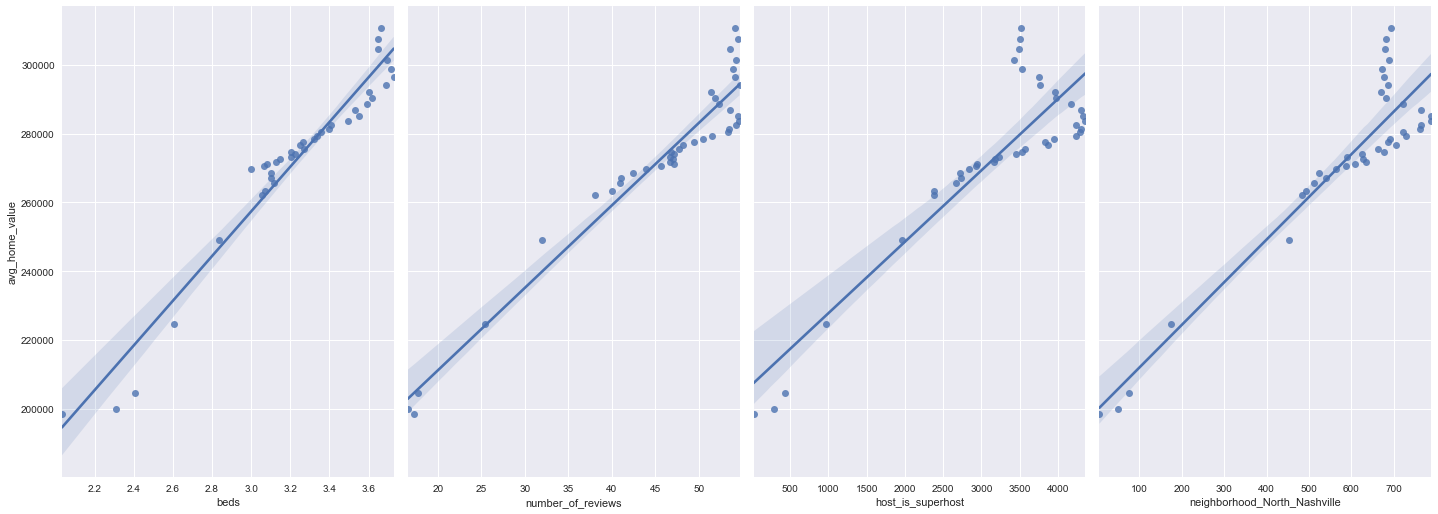

In [173]:
sns.pairplot(final_reg_features_df, x_vars=['beds','number_of_reviews','host_is_superhost', 'neighborhood_North_Nashville'], 
             y_vars='avg_home_value', height=7, aspect=0.7, kind='reg');

In [168]:
final_reg_features_df.to_csv("cleaned_data/final_reg_features.csv")

# STOP HERE

## Explore Multicollinearity

In [171]:
#X = regression_df.drop(['host_id','avg_home_value'], axis=1)
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
list(zip(X_train.columns, vif))

[('beds', 191.9529670063635),
 ('number_of_reviews', 726.5692198782383),
 ('host_is_superhost', 305.4022583706411),
 ('neighborhood_North_Nashville', 474.3754251931553)]

In [172]:
vif_scores = list(zip(X.columns, vif))
multi_co_cols = [x for x,vif in vif_scores if vif > 10]
multi_co_cols

['beds',
 'number_of_reviews',
 'host_is_superhost',
 'neighborhood_North_Nashville']

## Check for Assumptions of Linearity

In [174]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()

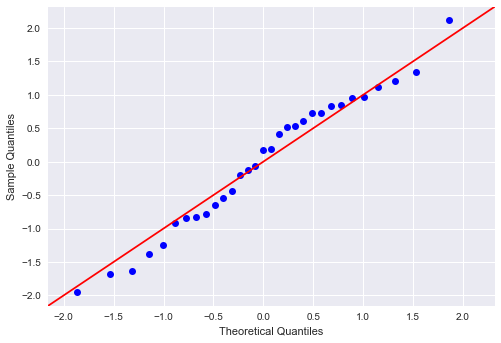

In [175]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

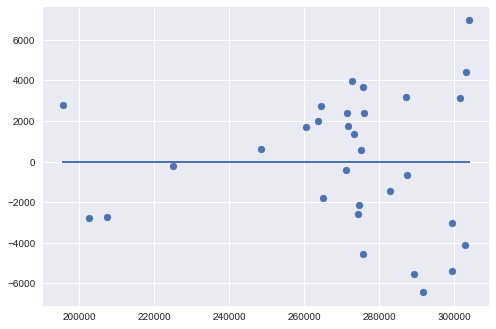

In [176]:
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

## Run a statistical test to test these assumptions

## Save Final model

In [169]:
df_pairs=regression_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. 
df_pairs.drop_duplicates(inplace=True)

In [170]:
df_pairs[(df_pairs.cc>.95) & (df_pairs.cc <1)]

cc
pairs                                                       
(host_id, id)                                       0.997730
(property_type_Condominium, property_type_Townh...  0.991316
(multi_listing_host, inventory)                     0.988569
(multi_listing_host, host_is_superhost)             0.987739
(bathrooms, beds)                                   0.986592
(inventory, neighborhood_East_Nashville)            0.985115
(beds, accommodates)                                0.983939
(neighborhood_North_Nashville, neighborhood_Sou...  0.983574
(neighborhood_North_Nashville, multi_listing_host)  0.983416
(neighborhood_North_Nashville, host_is_superhost)   0.983300
(beds, id)                                          0.982559
(id, bathrooms)                                     0.982540
(neighborhood_South_Nashville, host_is_superhost)   0.982298
(neighborhood_Downtown, instant_bookable)           0.981141
(multi_listing_host, instant_bookable)              0.980130
(neighborhood_Downtown, multi_listing_host)         0.978657
(bathrooms, host_id)                                0.978566
(inventory, instant_bookable)                       0.977095
(avg_home_value, host_id)                           0.976742
(neighborhood_South_Nashville, accommodates)        0.976635
(number_of_reviews, neighborhood_North_Nashville)   0.976392
(beds, host_id)                                     0.975399
(number_of_reviews, accommodates)                   0.975019
(multi_listing_host, neighborhood_South_Nashville)  0.974530
(accommodates, avg_home_value)                      0.973974
(id, avg_home_value)                                0.973626
(neighborhood_South_Nashville, number_of_reviews)   0.973016
(neighborhood_Downtown, host_is_superhost)          0.972012
(beds, avg_home_value)                              0.971721
(neighborhood_Madison, neighborhood_East_Nashvi...  0.970902
(neighborhood_North_Nashville, inventory)           0.968741
(host_is_superhost, inventory)                      0.966489
(neighborhood_Downtown, inventory)                  0.965260
(number_of_reviews, avg_home_value)                 0.965239
(neighborhood_Southeast_Nashville, neighborhood...  0.964681
(neighborhood_South_Nashville, inventory)           0.964013
(host_is_superhost, number_of_reviews)              0.963682
(accommodates, id)                                  0.962530
(number_of_reviews, id)                             0.960784
(instant_bookable, host_is_superhost)               0.960184
(inventory, neighborhood_Madison)                   0.958933
(neighborhood_West_Nashville, neighborhood_Midt...  0.956503
(neighborhood_West_Nashville, neighborhood_Madi...  0.955059
(number_of_reviews, host_id)                        0.955021
(accommodates, host_id)                             0.954158
(avg_home_value, bathrooms)                         0.953289
(neighborhood_North_Nashville, instant_bookable)    0.952894
(multi_listing_host, neighborhood_East_Nashville)   0.952620
(neighborhood_North_Nashville, accommodates)        0.951091
(beds, number_of_reviews)                           0.950792